# **Packages**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.metrics import root_mean_squared_log_error as rmsle, mean_squared_log_error as msle


# **Automotive**

In [54]:
with open("AUTOMOTIVE_pred.pkl","rb") as f:
    auto_pred = pickle.load(f)

auto_pred

,date,store_nbr,value,transactions_pred
0,2017-08-01,25,839,711.965361
1,2017-08-02,25,982,864.963848
2,2017-08-03,25,869,900.884604
3,2017-08-04,25,1021,1197.358942
4,2017-08-05,25,1171,1349.936724
...,...,...,...,...
805,2017-08-11,52,2957,2802.450369
806,2017-08-12,52,2804,2733.497446
807,2017-08-13,52,2433,2176.650316
808,2017-08-14,52,2074,1180.416405


In [55]:
def comparison(df,item):
    sns.lineplot(x="date", y="value", data=df, color="blue", label=f"Sales {item}")
    sns.lineplot(x="date", y="transactions_pred", data=df, color="red", label=f"Prediction sales {item}")
    plt.xticks(rotation=45)
    plt.show()

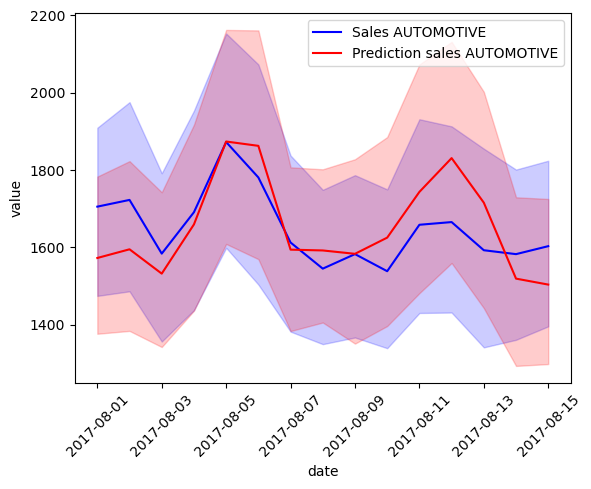

In [56]:
comparison(auto_pred,"AUTOMOTIVE")

# **Baby care**

In [57]:
def open_pred(pkl_file):
    with open(pkl_file,"rb") as f:
        return pickle.load(f)

In [58]:
babyCare_pred = open_pred("BABY CARE_pred.pkl")
babyCare_pred

,date,store_nbr,value,transactions_pred
0,2017-08-01,25,839,711.965361
1,2017-08-02,25,982,864.963848
2,2017-08-03,25,869,900.884604
3,2017-08-04,25,1021,1197.358942
4,2017-08-05,25,1171,1349.936724
...,...,...,...,...
805,2017-08-11,52,2957,2802.450369
806,2017-08-12,52,2804,2733.497446
807,2017-08-13,52,2433,2176.650316
808,2017-08-14,52,2074,1180.416405


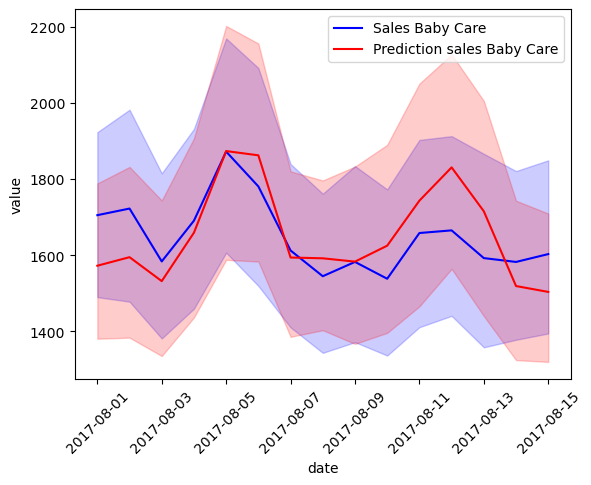

In [59]:
comparison(babyCare_pred,"Baby Care")

# **RMSLE for all stores per item**

## **Automotive**

In [60]:
auto_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               810 non-null    datetime64[ns]
 1   store_nbr          810 non-null    int64         
 2   value              810 non-null    int64         
 3   transactions_pred  810 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 25.4 KB


In [61]:
n_stores = len(auto_pred["store_nbr"].unique())
auto_pred["sle"] = (np.log(auto_pred["transactions_pred"] + 1) - np.log(auto_pred["value"] + 1)) ** 2

c:\Users\Angelique\anaconda3\envs\Essai\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
auto_pred["transactions_pred"].describe()

count     810.000000
mean     1653.419015
std       932.452069
min      -194.563195
25%      1041.392081
50%      1376.447016
75%      1956.108662
max      5125.342842
Name: transactions_pred, dtype: float64

In [63]:
auto_pred.loc[auto_pred["transactions_pred"] == auto_pred["transactions_pred"].min()]

,date,store_nbr,value,transactions_pred,sle
224,2017-08-15,14,1241,-194.563195,NaN


In [64]:
auto_pred.loc[auto_pred["transactions_pred"] < 0, "transactions_pred"] = 0

In [65]:
dates_list = list(auto_pred["date"].unique())
auto_metrics = {"date":[], "rmsle":[], "sem":[]}
for date in dates_list:
    df = auto_pred.loc[auto_pred["date"] == date, ["value","transactions_pred","sle"]].copy()
    auto_metrics["date"].append(date)
    auto_metrics["rmsle"].append(rmsle(df["value"],df["transactions_pred"]))
    auto_metrics["sem"].append(np.sqrt(df["sle"].std()/np.sqrt(n_stores)))
    

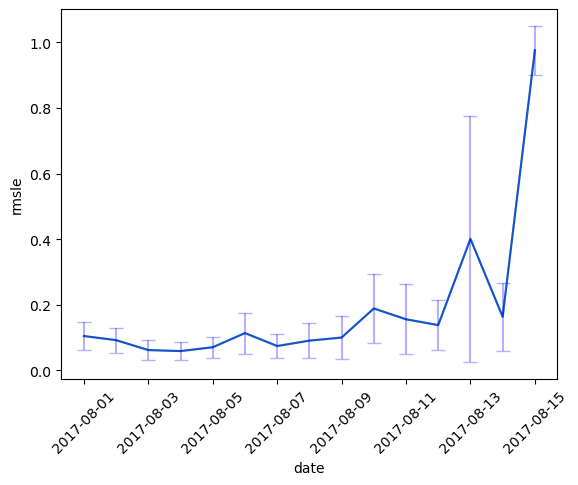

In [66]:
sns.lineplot(x="date",y="rmsle", data=auto_metrics)
plt.errorbar(x=auto_metrics["date"], y=auto_metrics["rmsle"], \
             yerr=auto_metrics["sem"], color="blue", alpha=0.3, capsize=5)
plt.xticks(rotation=45)
plt.show()

In [67]:
def rmsle_item(df):
    df["sle"] = (np.log(df["transactions_pred"] + 1) - np.log(df["value"] + 1)) ** 2
    n_stores = len(df["store_nbr"].unique())
    df.loc[df["transactions_pred"] < 0, "transactions_pred"] = 0
    dates_list = list(df["date"].unique())
    auto_metrics = {"date":[], "rmsle":[], "sem":[]}
    for date in dates_list:
        df_item = df.loc[df["date"] == date, ["value","transactions_pred","sle"]].copy()
        auto_metrics["date"].append(date)
        auto_metrics["rmsle"].append(rmsle(df_item["value"],df_item["transactions_pred"]))
        auto_metrics["sem"].append(np.sqrt(df_item["sle"].std()/np.sqrt(n_stores)))
    return auto_metrics

In [68]:
AUTO_metrics = rmsle_item(auto_pred)

## **Baby Care**

In [69]:
BABYCARE_rmsle = rmsle_item(babyCare_pred)

c:\Users\Angelique\anaconda3\envs\Essai\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
def rmsle_graph(df,item):
    sns.lineplot(x="date",y="rmsle", data=auto_metrics)
    plt.errorbar(x=auto_metrics["date"], y=auto_metrics["rmsle"], \
                 yerr=auto_metrics["sem"], color="blue", alpha=0.3, capsize=5)
    plt.title(f"RMSLE for {item}")
    plt.xticks(rotation=45)
    plt.show()

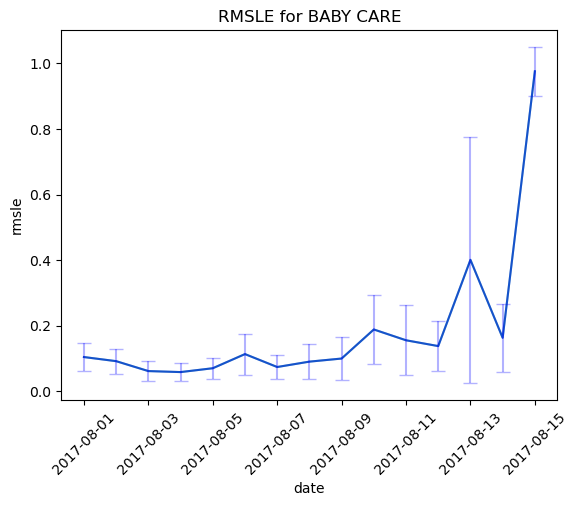

In [71]:
rmsle_graph(BABYCARE_rmsle,"BABY CARE")

## **GROCERY I**

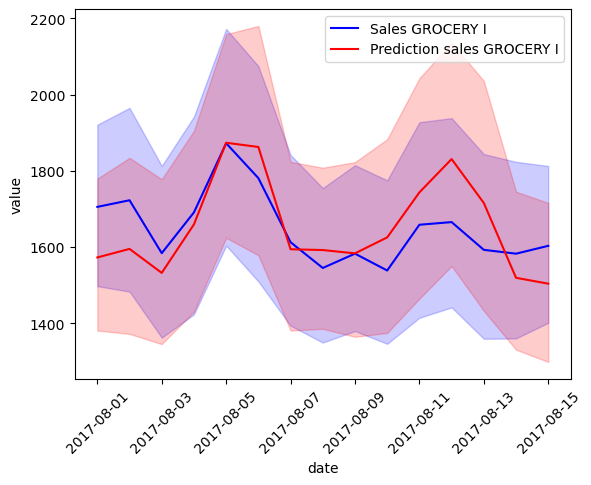

In [72]:
grocery_I = open_pred("GROCERY I_pred.pkl")
comparison(grocery_I,"GROCERY I")

c:\Users\Angelique\anaconda3\envs\Essai\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


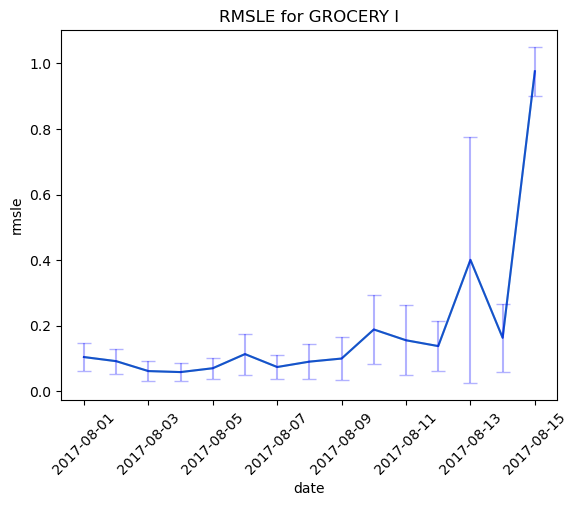

In [73]:
groceryI_rmsle = rmsle_item(grocery_I)
rmsle_graph(groceryI_rmsle,"GROCERY I")

I need to improve transactions prediction for the last 5 days.